# Пример использования детектора лица Viola Jones

Инструкция по обучению детектора доступна по [ссылке](http://docs.opencv.org/trunk/dc/d88/tutorial_traincascade.html) 

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Загружаем предобученные модели для детекции лиц и глаз

In [2]:
face_cascade = cv2.CascadeClassifier('../data/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('../data/haarcascade_eye.xml')

## Загружаем изображение для детекции

In [3]:
img = cv2.imread('../data/ocean.jpg')

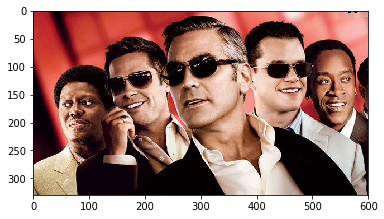

In [4]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Применяем детектор

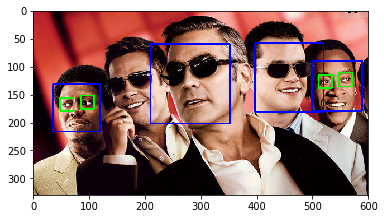

In [10]:
# преобразуем изображение в чернобелый формат
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# запускаем детектор лиц
faces = face_cascade.detectMultiScale(gray, 1.3, 3)

detections = np.copy(img)  # создаем копию изображения для визуализации результатов

for (x,y,w,h) in faces:
    # отрисовываем детекцию лиц
    cv2.rectangle(detections,(x,y),(x+w,y+h),(255,0,0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = detections[y:y+h, x:x+w]
    # запускаем детектор глаз для каждой детекции лица
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        # отрисовываем детекцию глаз
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.imshow(cv2.cvtColor(detections, cv2.COLOR_BGR2RGB))